# Solutions - Assignment 1

### Math 502 - Lamoureux

### Due January 31, 2019

## Exercise 0

Plot a few Bessel functions of the first kind, using your knowledge of Python. 
Plot for orders $\alpha = 0,1,2,3$ and choose a sensible range of values for the domain.




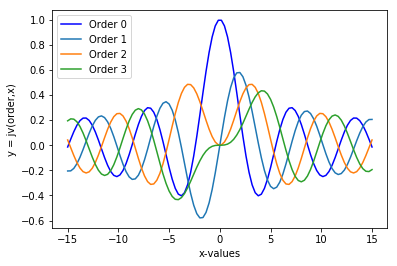

In [12]:
# I'll import a few libraries, in a sloppy way
%matplotlib inline
from scipy.special import jv
from numpy import *
from matplotlib.pyplot import *

#  bessel function, using an interval with negatives and positives
x = linspace(-15,15,100)
y0 = jv(0,x)
y1 = jv(1,x)
y2 = jv(2,x)
y3 = jv(3,x)
plot(x,y0,'b',label='Order 0')
plot(x,y1,label='Order 1')
plot(x,y2,label='Order 2')
plot(x,y3,label='Order 3')
xlabel("x-values"); ylabel("y = jv(order,x)");
legend(loc='upper left');



## Exercise 1

Recall in Lecture 4 (Jan 22), we had a model for the traffic jam model, with a jump in the velocity function.
Replace the jump function for $v(x)$ with a smooth, monotonic function that has a left limit of $v_{left}$ and a right limit of $v_{right}$. Choose a function where it is easy to calculate the antiderivative of slowness $1/v(x)$. 

Do calculate the function $S(x)$ as the antiderivative of slowness $1/v(x)$, for your choice of $v(x)$.

Hint: Rational functions won't work. (Exercise 1a. Why not?) You might want to consider functions like arctan, $\tan^{-1}(x)$ or hyperbolic tan, $\tanh(x)$. 

Soln:

The idea is to choose $1/v(x)$ so it is easy to integrate, and has a left/right behaviour that we want. Something like
$$1/v(x) = A + B \tanh(Cx)$$
would be a good choice, since tanh(x) takes the value -1 at minus infinity, and +1 at plus infinity. C is at constant that adjusts how rapidly the slowness (or velocity) will change from one value to the other.

We solve for A, B by setting
$$1/v_{left} = A - B, 1/v_{right} = A + B,$$
which we solve as 
$$ A = (1/v_{right} + 1/v_{left})/2, B = (1/v_{right} - 1/v_{left})/2.$$

The antiderivative of tanh(x) is the log of x=cosh(x), so we can write
$$S(x) = \int (A + B \tanh(Cx)) dx = Ax + \frac{B}{C} \log (\cosh(Cx)).$$

## Exercise 2

Adjust the code in Lecture 4 to use your new definition of $v(x)$ and the resulting $S(x).$ Show that it works by making a few illustrative plots.

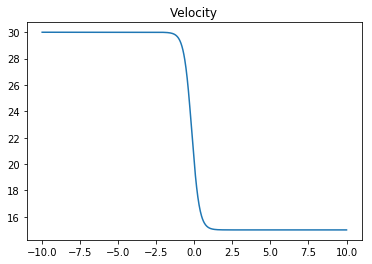

In [31]:
## Let's first plot the functions given above:

Vleft = 30 # meters per second
Vright = 15 # meters per second
A = (1/Vright + 1/Vleft)/2
B = (1/Vright - 1/Vleft)/2
C = 2

def v(x):
    return 1/(A + B*tanh(C*x))

def S(x):
    return A*x + (B/C)*log(cosh(C*x))

x = linspace(-10,10,1000)
plot(x, v(x));
title('Velocity');

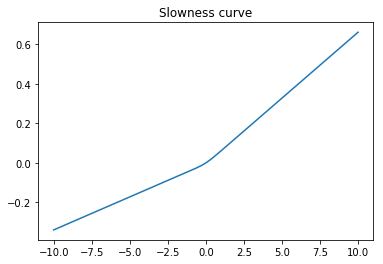

In [32]:
plot(x,S(x))
title('Slowness curve');

Now we just copy in the code we need from Lecture 4. 

With the widget, you can play with the movement. The bump changes much more continuously as we pass through the change of velocity section.

In [38]:
from ipywidgets import interact

width = 3

def bump(t):
    return exp((-t**2)/((width/(2*Vleft))**2))

def update(t=0):
    plot(x,bump(S(x)-t)/v(x))
    ylim([0,.07])
    
interact(update,t=(-2,2,.01));

interactive(children=(FloatSlider(value=0.0, description='t', max=2.0, min=-2.0, step=0.01), Output()), _dom_c…

## Exercise 3

Kepler's third law of planetary motion says that the length of time it takes a planet to orbit the sun is proportional to its distance from the sun, raised to some (fractional) power. That is:
$$ T = k R^\alpha,$$
where $T$ is the length of time for one complete orbit, $R$ is the distance between the planet and the sun, $\alpha$ is a fixed power, and $k$ is some univeral constant that works for all the planets around our sun. 

Use Dimensional Analysis (Buckingham's Pi Theorem) to derive this result. Tell me what the value of $\alpha$ is. 

Don't use calculus! (Although you may have seen this solved via differential equations in a calc or physics class.)

Hint: There is some ambiguity because of two masses involved (sun and planet). Newton knew that the mass of the planet does not matter to $T$, so you can assume this as well. Newton's universal gravitation constant $G$ also enters into the problem -- you can look up what units it is measured in, on Google. Or you can figure it out yourself from the force formula for planetary attraction $$\mbox{ Force } = G \frac{Mm}{R^2}$$
where $M,m$ are the masses of the sun and planet.

You can also check your answer by looking up Kepler's laws on Google. 

**Solution:**

We have 4 parameters: T (in units of time), R (in units of distance), M (in units of mass), and G (we need to figure out the units, or look it up). 

From the formula $\mbox{ Force } = G \frac{Mm}{R^2}$, and remembering that Force is a mass times an acceleration (mass times distance, divided by time squared), we concluse that $G$ is in units of distance cubed, divided by time squared and mass.

There are 3 physical units, time, distance and mass. 

The 3x4 matrix we need is thus
| T | R | M | G | |
| --- | --- | --- | --- | --- |
| 1 | 0 | 0 | -2 | time |
| 0 | 1 | 0 |  3 | distance | 
| 0 | 0 | 1 | -1 | mass |

Notice the matrix is in row-echelon form. I did this on purpose, by matching the columns  T, R, M with their corresponding units time, distance, mass, in order. 

This makes it easy to read off the dimensionless parameter using back substitution. That is, just solve the matrix equation
$$\left[
\begin{array}{rrrr}
1 & 0 & 0 & -2 \\
0 & 1 & 0 &  3 \\
0 & 0 & 1 & -1
\end{array}
\right]
\left[
\begin{array}{r}
x_1 \\
x_2 \\
x_3 \\
1
\end{array}
\right] = 0.
$$

So we find
$$
\left[
\begin{array}{r}
x_1 \\
x_2 \\
x_3 \\
1
\end{array}
\right] = 
\left[
\begin{array}{r}
2 \\
-3 \\
1 \\
1
\end{array}
\right].
$$
Our dimensionless parameter is thus 
$$\Pi = GMT^2/R^3.$$

(But seriously, you don't have to use the matrix if you don't want. A faster way: Start with G, in units of distances cubed, divided by mass and time squared. Multiply G by M to cancel the "mass" units. Then take GM and multiply by $T^2$ to cancel the "time" units. Finally, take $GMT^2$ and divide by $R^3$ to cancel the distance units.)

Anyhow, the second part of Buckingham Pi tells us that
$$ \Pi = GMT^2/R^3 = constant.$$
Moving the stuff to the other side, we have
$$T^2 = \frac{R^3}{GM}*C,$$
where $C$ is some constant. Taking roots,
$$T = k{R^{3/2}}$$
where $k = \sqrt{C/GM}$ is a constant. 


## Exercise 4

Make a table listing the 8 planets plus Pluto, their distance to the sun, and the period of their orbit. 

Make a log-log plot of period versus distance, and check that you get a straight line with slope equal to $\alpha$. (At least approximately.)

i.e. Taking logs of the equation $T = kR^\alpha$ gives
$$\log T = \log k + \alpha \log R,$$
which is the equation of a line in $x = \log R, y = \log T.$



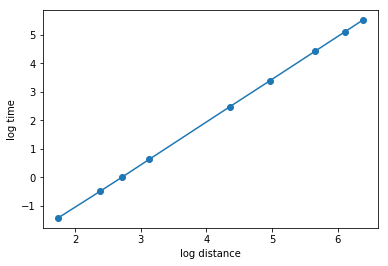

In [45]:
# data from Hyperphysics (thanks to Ahmad for this)
T = [0.241, 0.615, 1, 1.88, 11.9, 29.5, 84, 165, 248] # years
R = [5.69, 10.8, 15.0, 22.8, 77.8, 143, 287, 450, 590] # 10^10 m

plot(log(R),log(T),'-o');
xlabel("log distance"); ylabel("log time");



In [51]:
## To check the slope, we can fit a line to the data using Python code
from scipy.optimize import curve_fit

# first, we use a linear function to estimate
def f(x,m,b):
    return m*x + b

# then, curve fit, using the log data
result = curve_fit(f,log(R),log(T))
print(result[0])

[ 1.49742171 -4.04428681]


The result is a slope m = 1.4974, which is very close to our result of $\alpha = 3/2.$

## Exercise 5

Nuclear bombs, when exploded in the atmosphere, produce a large fireball that expands in the approximate shape of a sphere of some radius $r = r(t)$, which is a function of elapsed time. The rate at which it expands depends on the energy $E$ released by the bomb, the elapsed time $t$ since the detonation, and the density $\rho$ of the surrounding air. 

Curiously, the actual air pressure is irrelevant, as it is so small compared to the explosive blast.

Use dimensional analysis to find $r(t)$ as a function of $E,t,\rho$. (times some fixed constant)

**Solution:**

I don't want to work too hard. I could use that matrix thingy, but let's be lazy.

We have four parameters, r (a distance), t (a time), $\rho$ (a density, in mass/distance-cubed), and E (an energy, in mass times distance-squared, divided by time-squared).

Why do we know the energy units by heart? From Einstein's $E = mc^2$, where m is a mass and c is a velocity. See, you knew that.

So, how do I get something dimensionless?

Start with E, divide by $\rho$ to get the masses to cancel. Then we have have $E/\rho$ in units of distance to the 5th power, divided by a time-squared. So 
$$E t^2/\rho r^5$$
will be dimensionless.

Wasn't that easy?

So by Buckingham Pi, we have
$$\Pi = E  t^2/\rho r^5 = constant.$$

Solving for r, we have
$$ r(t) = k(E/\rho)^{1/5}t^{2/5}.$$

## Exercise 6 - for fun.

Can you animate the result in Exercise 5, showing some bomb blasts of various energies? Something pretty?

## Hold my beer.

In [59]:
## precompute some vectors, for polar coordinates

theta = linspace(0,2*pi,100)
ctheta = cos(theta)
stheta = sin(theta)

## I will just draw some circles with the appropriate radius from the formulas above. 

def drawBombs(t=1,E1=1,E2=5):
    r1 = (E1**(1/5))*(t**(2/5))
    r2 = (E2**(1/5))*(t**(2/5))
    plot(r1*ctheta,r1*stheta,'b',r2*ctheta,r2*stheta,'r')
    xlim([-10,10]); ylim([-10,10])

interact(drawBombs,t=(0,100,1),E1=(1,10),E2=(1,10));

interactive(children=(IntSlider(value=1, description='t'), IntSlider(value=1, description='E1', max=10, min=1)…